## Analysis
We have tested 10 drugs to see which ones would be more efficient in curing the cancer. To answer the question we had to see what response does Metastatic Site and Tumor Volume have on the drug. Turns out Average Tumor Size increased significantly after taking "Capolumin" in 45 days. The survival rate is also much more higher with Capomulin drug. Finally Capolumin help tumor to decrease for 20%.

In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem
from random import random

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load 
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
file1 = pd.read_csv(mouse_drug_data_to_load)
file2 = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
raw_data_df = pd.merge(file1, file2, on="Mouse ID", how="outer")
raw_data_df.head(10)
# list(raw_data_df)

,Mouse ID,Drug,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,f234,Stelasyn,0,45.000000,0
1,f234,Stelasyn,5,47.313491,0
2,f234,Stelasyn,10,47.904324,0
3,f234,Stelasyn,15,48.735197,1
4,f234,Stelasyn,20,51.112713,2
5,f234,Stelasyn,25,52.178602,2
6,f234,Stelasyn,30,56.873817,2
7,f234,Stelasyn,35,57.748758,2
8,x402,Stelasyn,0,45.000000,0
9,x402,Stelasyn,5,46.327570,1


## Tumor Response to Treatment

In [40]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
mean_tumor_df = raw_data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()   
mean_tumor_df = pd.DataFrame({"Avg Tumor Vol (mm3)": mean_tumor_df})

# reset an index to get a clean look
mean_tumor_df = mean_tumor_df.reset_index()
mean_tumor_df.head(2)

,Drug,Timepoint,Avg Tumor Vol (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086


In [41]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
se_tumor_df = raw_data_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].sem()
se_tumor_df = pd.DataFrame({"SE Tumor Volume (mm3)": se_tumor_df})
se_tumor_df = pd.DataFrame(se_tumor_df)
# reset an index to get a clean look
se_tumor_df = se_tumor_df.reset_index()
se_tumor_df.head(2)

,Drug,Timepoint,SE Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593


In [42]:
# Minor Data Munging to Re-Format the Data Frames
# https://www.analyticsvidhya.com/blog/2014/09/data-munging-python-using-pandas-baby-steps-python/

# drugs_df = raw_data_df.index(["Timepoint", "Tumor Volume (mm3)" "Drug"], drop = True).unstack("Drug")
# drugs_df.head(2)

mean_tumor_df = mean_tumor_df.pivot(index = "Timepoint", columns = "Drug")["Avg Tumor Vol (mm3)"]
mean_tumor_df.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818


In [43]:
se_tumor_df = se_tumor_df.pivot(index = "Timepoint", columns = "Drug")["SE Tumor Volume (mm3)"]
se_tumor_df.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.18895


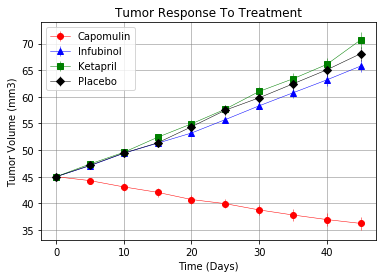

In [44]:
# Generate the Plot (with Error Bars)
x_axis = mean_tumor_df.index

# print(mean_tumor_df.columns)
# print(se_tumor_df.columns)

plt.errorbar(x_axis, mean_tumor_df["Capomulin"], yerr = se_tumor_df["Capomulin"], 
             marker="o", color="red", linewidth=0.5)
             
plt.errorbar(x_axis, mean_tumor_df["Infubinol"], yerr = se_tumor_df["Infubinol"], 
             marker="^", color="blue", linewidth=0.5) 

plt.errorbar(x_axis, mean_tumor_df["Ketapril"], yerr = se_tumor_df["Ketapril"], 
             marker="s", color="green", linewidth=0.5)

plt.errorbar(x_axis, mean_tumor_df["Placebo"], yerr = se_tumor_df["Placebo"], 
             marker="D", color="black", linewidth=0.5)

plt.legend(loc="best")
plt.title("Tumor Response To Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the figure
plt.savefig('plt_tumor.png')

## Metastatic Response to Treatment

In [45]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
mean_metastatic_df = raw_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].mean()   
mean_metastatic_df = pd.DataFrame({"Avg Metastatic Sites": mean_metastatic_df})
mean_metastatic_df = mean_metastatic_df.reset_index()
mean_metastatic_df.head(2)

,Drug,Timepoint,Avg Metastatic Sites
0,Capomulin,0,0.00
1,Capomulin,5,0.16


In [46]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
se_metastatic_df = raw_data_df.groupby(["Drug", "Timepoint"])["Metastatic Sites"].sem()
se_metastatic_df = pd.DataFrame({"SE Metastatic Sites": se_metastatic_df})
se_metastatic_df = se_metastatic_df.reset_index()
se_metastatic_df.head(2)

,Drug,Timepoint,SE Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833


In [47]:
# Minor Data Munging to Re-Format the Data Frames
mean_metastatic_df = mean_metastatic_df.pivot(index = "Timepoint", columns = "Drug")["Avg Metastatic Sites"]
mean_metastatic_df.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.00,0.000000,0.00000,0.000,0.00,0.00,0.00,0.000000
5,0.16,0.380952,0.28,0.304348,0.26087,0.375,0.32,0.12,0.24,0.166667


In [48]:
se_metastatic_df =se_metastatic_df.pivot(index = "Timepoint", columns = "Drug")["SE Metastatic Sites"]
se_metastatic_df.head(2)

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.0981,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709


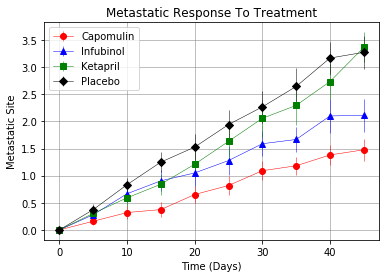

In [49]:
# Generate the Plot (with Error Bars)
x_axis = mean_metastatic_df.index

# print(mean_tumor_df.columns)
# print(se_tumor_df.columns)

plt.errorbar(x_axis, mean_metastatic_df["Capomulin"], yerr = se_metastatic_df["Capomulin"], 
             marker="o", color="red", linewidth=0.5)
             
plt.errorbar(x_axis, mean_metastatic_df["Infubinol"], yerr = se_metastatic_df["Infubinol"], 
             marker="^", color="blue", linewidth=0.5) 

plt.errorbar(x_axis, mean_metastatic_df["Ketapril"], yerr = se_metastatic_df["Ketapril"], 
             marker="s", color="green", linewidth=0.5)

plt.errorbar(x_axis, mean_metastatic_df["Placebo"], yerr = se_metastatic_df["Placebo"], 
             marker="D", color="black", linewidth=0.5)

plt.legend(loc="best")
plt.title("Metastatic Response To Treatment") 
plt.xlabel("Time (Days)")
plt.ylabel("Metastatic Site")
plt.grid(color='grey', linestyle='-', linewidth=0.5)

# Save the figure
plt.savefig('plt_metastatic.png')

## Survival Rates

In [50]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
count_mice_df = raw_data_df.groupby(["Drug", "Timepoint"])["Mouse ID"].count()
# count_mice_df = count_mice_df({"Count Mice": count_mice_df})

# Convert to DataFrame
count_mice_df = pd.DataFrame({"Count Mice": count_mice_df})
count_mice_df = count_mice_df.reset_index()
count_mice_df.head(2)

,Drug,Timepoint,Count Mice
0,Capomulin,0,25
1,Capomulin,5,25


In [51]:
# Minor Data Munging to Re-Format the Data Frames
count_mice_df = count_mice_df.pivot(index = "Timepoint", columns = "Drug")["Count Mice"]
count_mice_df.head(2)


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24


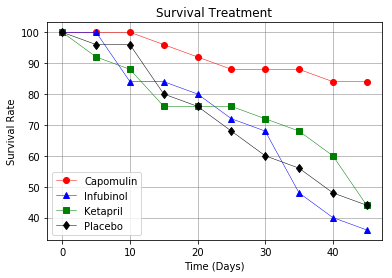

In [52]:
# Generate the Plot (Accounting for percentages)
drug = [('Capomulin','o','red'),('Infubinol','^','blue'),('Ketapril','s','green'),('Placebo','d','black')]
x_axis = count_mice_df
for drug, marker, colors in drug:
    total_mouse = count_mice_df[drug][0]
    survival_rate = (count_mice_df[drug]/total_mouse)*100
    survival_treatment_plt = plt.plot(x_axis.index, survival_rate, marker=marker, color=colors, linewidth=0.5)
    
plt.legend(loc="best")
plt.title("Survival Treatment")
plt.xlabel("Time (Days)")
plt.ylabel("Survival Rate")
plt.grid(color='grey', linestyle='-', linewidth=0.5)
plt.savefig('plt_survival.png')
plt.show()

## Summary Bar Graph

In [16]:
# Calculate the percent changes for each drug

# Need to break down ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~
percentage_change = (mean_tumor_df.iloc[-1]/(mean_tumor_df.iloc[0])-1)*100
percentage_change
# Display the data to confirm

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

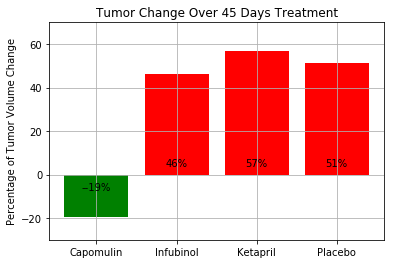

In [53]:
# Store all Relevant Percent Changes into a Tuple
pct_changes = (percentage_change["Capomulin"], percentage_change["Infubinol"], percentage_change["Ketapril"],
              percentage_change["Placebo"])

# Splice the data between passing and failing drugs
fig, ax = plt.subplots()
ind = np.arange(len(pct_changes))
width = 0.8
rectsPass = ax.bar(ind[0], pct_changes[0], width, color="green")
rectsFail = ax.bar(ind[1:4], pct_changes[1:4], width, color="red")

# Orient widths. Add labels, tick marks, etc. 
ax.set_ylabel("Percentage of Tumor Volume Change")
ax.set_title("Tumor Change Over 45 Days Treatment")
ax.set_xticks(ind)
ax.set_xticklabels(("Capomulin","Infubinol", "Ketapril", "Placebo")) 
# ax.set_autoscaley_on(False)
ax.set_ylim([-30, 70])
ax.grid(True)

# Use functions to label the percentages of changes
def autolabelFail(rects):
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., 3,
               '%d%%' % int(height),
               ha='center', va='bottom', color="black")

def autolabelPass(rects):
   for rect in rects:
       height = rect.get_height()
       ax.text(rect.get_x() + rect.get_width()/2., -8,
               '-%d%%' % int(height),
               ha='center', va='bottom', color="black")    

# Call functions to implement the function calls
autolabelFail(rectsFail)
autolabelPass(rectsPass)

plt.savefig('percentage_change.png')
fig.show()